In [1]:
print("""
@Title        : 
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-05 20:30:34
@Description  : 
""")


@Title        : 
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-05 20:30:34
@Description  : 



In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
CSI300 = yf.download('000300.SS', start='2017-01-01',
                     end='2023-12-05')
df = CSI300[['Adj Close']]

[*********************100%%**********************]  1 of 1 completed


## 尝试使用 time series 进行预测 ❌

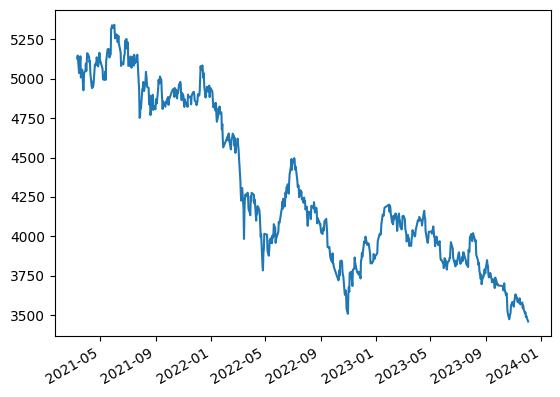

In [4]:
fig, ax = plt.subplots()
ax.plot(df)
fig.autofmt_xdate()

In [5]:
rts = df['Adj Close'].apply(np.log).diff(1).dropna()

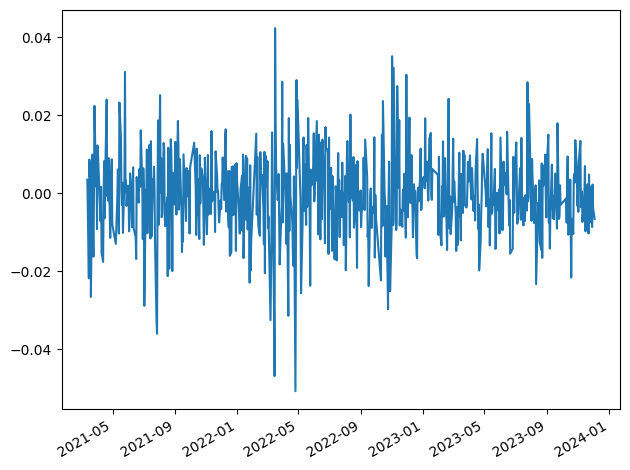

In [6]:
fig, ax = plt.subplots()
ax.plot(rts)
fig.autofmt_xdate()
plt.tight_layout()

In [7]:
from statsmodels.tsa.stattools import adfuller
adfuller(rts)

(-26.11021808488275,
 0.0,
 0,
 663,
 {'1%': -3.4402516575519346,
  '5%': -2.8659091963995573,
  '10%': -2.569096752341498},
 -4007.2690262999213)

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

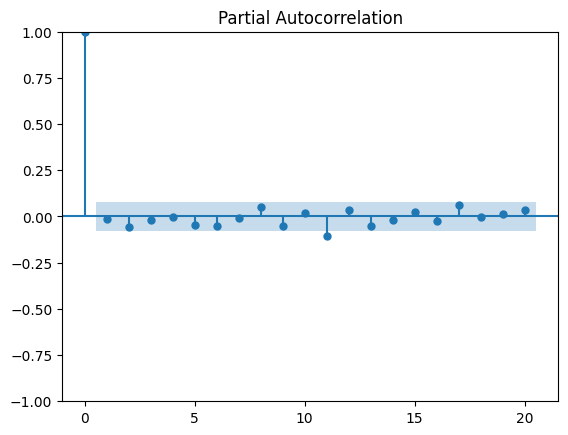

In [9]:
fig = plot_pacf(rts, lags=20)

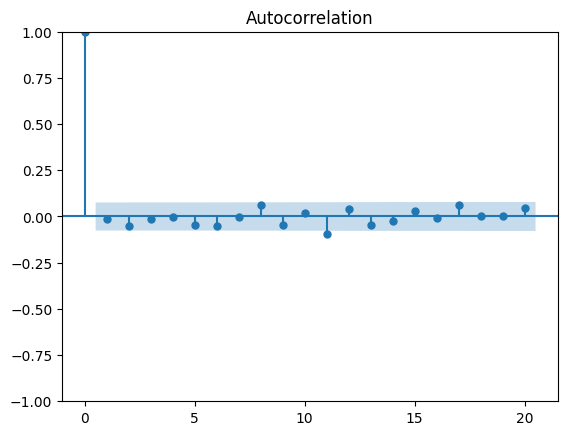

In [10]:
fig = plot_acf(rts, lags=20)

In [11]:
rts

Date
2021-03-12    0.003535
2021-03-15   -0.021773
2021-03-16    0.008664
2021-03-17    0.004224
2021-03-18    0.007988
                ...   
2023-11-28    0.001872
2023-11-29   -0.008623
2023-11-30    0.002259
2023-12-01   -0.003817
2023-12-04   -0.006550
Name: Adj Close, Length: 664, dtype: float64

没法进行时间序列预测，完全是属于噪声

## 尝试使用均线进行预测

In [19]:
df.head()

,Adj Close
Date,
2021-03-11,5128.220215
2021-03-12,5146.379883
2021-03-15,5035.540039
2021-03-16,5079.359863
2021-03-17,5100.859863


In [89]:
df.loc[:, ['log_rtn']] = df['Adj Close'].apply(np.log).diff(1)
df.loc[:, ['sma_5']] = df['Adj Close'].rolling(window=5).mean()
df.loc[:, ['sma_10']] = df['Adj Close'].rolling(window=10).mean()
df.tail()

,Adj Close,log_rtn,sma_5,position,strategy,strategy_cum,bh_cum,position_short,strategy_short,strategy_short_cum,sma_10
Date,,,,,,,,,,,
2023-11-28,3518.520020,0.001872,3534.881982,0,0.0,0.830717,0.686109,-1,-0.001872,1.000438,3557.948022
2023-11-29,3488.310059,-0.008623,3523.660010,0,-0.0,0.830717,0.680218,-1,0.008623,1.009102,3546.054028
2023-11-30,3496.199951,0.002259,3510.595996,0,0.0,0.830717,0.681757,-1,-0.002259,1.006825,3538.438013
2023-12-01,3482.879883,-0.003817,3499.569971,0,-0.0,0.830717,0.679160,-1,0.003817,1.010675,3529.918994
2023-12-04,3460.139893,-0.006550,3489.209961,0,-0.0,0.830717,0.674725,-1,0.006550,1.017317,3518.300977


In [79]:
df.loc[:, ['position']] = (df['Adj Close'] > df['sma_5']).astype(int)
df

,Adj Close,log_rtn,sma_5,position,strategy,strategy_cum,bh_cum
Date,,,,,,,
2021-03-11,5128.220215,NaN,NaN,0,NaN,NaN,NaN
2021-03-12,5146.379883,0.003535,NaN,0,0.0,1.000000,1.003541
2021-03-15,5035.540039,-0.021773,NaN,0,-0.0,1.000000,0.981927
2021-03-16,5079.359863,0.008664,NaN,0,0.0,1.000000,0.990472
2021-03-17,5100.859863,0.004224,5098.071973,1,0.0,1.000000,0.994665
...,...,...,...,...,...,...,...
2023-11-28,3518.520020,0.001872,3534.881982,0,0.0,0.830717,0.686109
2023-11-29,3488.310059,-0.008623,3523.660010,0,-0.0,0.830717,0.680218
2023-11-30,3496.199951,0.002259,3510.595996,0,0.0,0.830717,0.681757


In [82]:
df = df.dropna()
df.loc[:, 'position_short'] = np.where(df['Adj Close'] > df['sma_5'], 1, -1)
df.head()

,Adj Close,log_rtn,sma_5,position,strategy,strategy_cum,bh_cum,position_short
Date,,,,,,,,
2021-03-17,5100.859863,0.004224,5098.071973,1,0.000000,1.000000,0.994665,1
2021-03-18,5141.770020,0.007988,5100.781934,1,0.007988,1.008020,1.002642,1
2021-03-19,5007.089844,-0.026543,5072.923926,0,-0.026543,0.981617,0.976380,-1
2021-03-22,5057.149902,0.009948,5077.245898,0,0.000000,0.981617,0.986141,-1
2021-03-23,5009.250000,-0.009517,5063.223926,0,-0.000000,0.981617,0.976801,-1


In [90]:
df = df.dropna()
df.loc[:, 'position_5>10'] = np.where(df['sma_5'] > df['sma_10'], 1, -1)
df.head()

,Adj Close,log_rtn,sma_5,position,strategy,strategy_cum,bh_cum,position_short,strategy_short,strategy_short_cum,sma_10,position_5>10
Date,,,,,,,,,,,,
2021-03-30,5094.729980,0.009436,5006.928027,1,0.009436,0.992672,0.993469,1,0.009436,0.986584,5035.075977,-1
2021-03-31,5048.359863,-0.009143,5030.862012,1,-0.009143,0.983637,0.984427,1,-0.009143,0.977604,5029.825977,1
2021-04-01,5110.779785,0.012289,5067.747949,1,0.012289,0.995799,0.996599,1,0.012289,0.989692,5026.726953,1
2021-04-02,5161.560059,0.009887,5092.461914,1,0.009887,1.005694,1.006501,1,0.009887,0.999525,5042.173975,1
2021-04-06,5140.339844,-0.004120,5111.153906,1,-0.004120,1.001559,1.002363,1,-0.004120,0.995416,5050.492969,1


In [72]:
sum((df['position'] == 1 ) & (df['position'].shift(1) == 0))

88

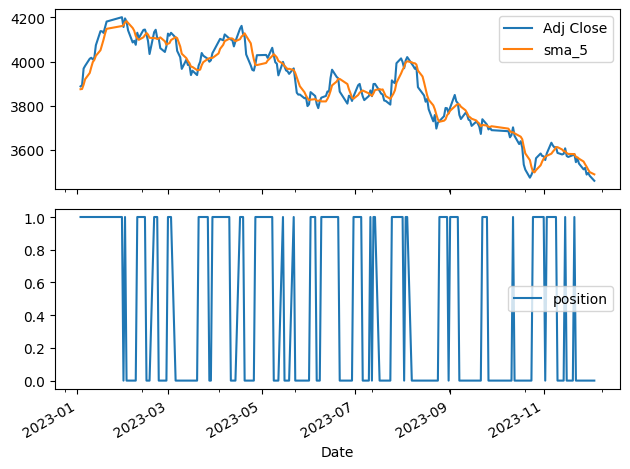

In [73]:
fig, ax = plt.subplots(2, sharex=True)
df.loc['2023', ['Adj Close', 'sma_5']].plot(ax=ax[0])
df.loc['2023', ['position']].plot(ax=ax[1])
fig.autofmt_xdate()
plt.tight_layout()

In [74]:
df.loc[:, ['strategy']] = df['position'].shift(1) * df['log_rtn']
df.loc[:, ['strategy_cum']] = df['strategy'].cumsum().apply(np.exp)
df.loc[:, ['bh_cum']] = df['log_rtn'].cumsum().apply(np.exp)

In [85]:
df.loc[:, ['strategy_short']] = df['position_short'].shift(1) * df['log_rtn']
df.loc[:, ['strategy_short_cum']] = df['strategy_short'].cumsum().apply(np.exp)

In [93]:
df.loc[:, ['strategy_5>10']] = df['position_5>10'].shift(1) * df['log_rtn']
df.loc[:, ['strategy_5>10_cum']] = df['strategy_5>10'].cumsum().apply(np.exp)

In [94]:
df.tail()

,Adj Close,log_rtn,sma_5,position,strategy,strategy_cum,bh_cum,position_short,strategy_short,strategy_short_cum,sma_10,position_5>10,strategy_5>10,strategy_5>10_cum
Date,,,,,,,,,,,,,,
2023-11-28,3518.520020,0.001872,3534.881982,0,0.0,0.830717,0.686109,-1,-0.001872,1.000438,3557.948022,-1,-0.001872,0.802877
2023-11-29,3488.310059,-0.008623,3523.660010,0,-0.0,0.830717,0.680218,-1,0.008623,1.009102,3546.054028,-1,0.008623,0.809830
2023-11-30,3496.199951,0.002259,3510.595996,0,0.0,0.830717,0.681757,-1,-0.002259,1.006825,3538.438013,-1,-0.002259,0.808003
2023-12-01,3482.879883,-0.003817,3499.569971,0,-0.0,0.830717,0.679160,-1,0.003817,1.010675,3529.918994,-1,0.003817,0.811093
2023-12-04,3460.139893,-0.006550,3489.209961,0,-0.0,0.830717,0.674725,-1,0.006550,1.017317,3518.300977,-1,0.006550,0.816423


<Axes: xlabel='Date'>

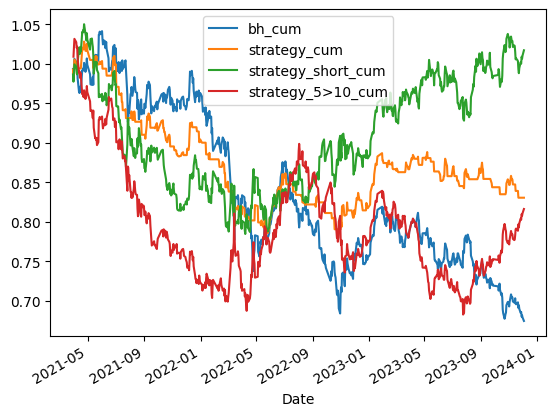

In [95]:
df[['bh_cum', 'strategy_cum', 'strategy_short_cum', 'strategy_5>10_cum']].plot()

长期来看，不做空是可以获得超额收益，但是仍然是要受到市场趋势的影响，做空似乎可以获得超额收益，但是也没有说能挣钱。

用 SMA 5 > SMA 10 的效果更差

最好的效果是：使用 Close > SMA 5 并配合卖空

## 直接使用回归预测

In [97]:
CSI300.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-11,5024.560059,5138.410156,5020.580078,5128.220215,5128.220215,189600
2021-03-12,5153.669922,5153.669922,5086.819824,5146.379883,5146.379883,201000
2021-03-15,5116.120117,5120.879883,4992.399902,5035.540039,5035.540039,204200
2021-03-16,5054.410156,5084.310059,5009.950195,5079.359863,5079.359863,161400
2021-03-17,5062.770020,5123.549805,5020.129883,5100.859863,5100.859863,149200


In [102]:
from utils.funcs import add_original_feature
df_new = pd.DataFrame()

In [103]:
add_original_feature(CSI300, df_new)

In [104]:
df_new

,open,open_1,close_1,high_1,low_1,volume_1
Date,,,,,,
2021-03-11,5024.560059,NaN,NaN,NaN,NaN,NaN
2021-03-12,5153.669922,5024.560059,5128.220215,5138.410156,5020.580078,189600.0
2021-03-15,5116.120117,5153.669922,5146.379883,5153.669922,5086.819824,201000.0
2021-03-16,5054.410156,5116.120117,5035.540039,5120.879883,4992.399902,204200.0
2021-03-17,5062.770020,5054.410156,5079.359863,5084.310059,5009.950195,161400.0
...,...,...,...,...,...,...
2023-11-28,3510.659912,3534.439941,3511.939941,3534.439941,3492.860107,99100.0
2023-11-29,3518.879883,3510.659912,3518.520020,3521.050049,3501.110107,89300.0
2023-11-30,3485.520020,3518.879883,3488.310059,3519.199951,3482.239990,98800.0
